# CAR PRICE PREDICTION

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading and Viewing our Data Set

In [3]:
Train = pd.read_csv('train.csv')

In [4]:
Train['Distance'] =Train['Distance'].str.replace(',', '').astype(float)

In [5]:
Train.drop(['VehicleID'], axis = 1, inplace = True)


In [6]:
Train.describe(include="all")

,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
count,7205,7205,7205,7184,7205,7188.000000,7008,4.845000e+03
unique,3,55,1223,33,21,NaN,3,NaN
top,Lagos,Toyota,Camry,"2,008",Black,NaN,Foreign Used,NaN
freq,3318,2742,651,755,2128,NaN,4896,NaN
mean,NaN,NaN,NaN,NaN,NaN,11.847999,NaN,1.031989e+05
std,NaN,NaN,NaN,NaN,NaN,25.318922,NaN,1.182902e+05
min,NaN,NaN,NaN,NaN,NaN,0.450000,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,3.500000,NaN,5.235200e+04
50%,NaN,NaN,NaN,NaN,NaN,5.650000,NaN,8.083000e+04
75%,NaN,NaN,NaN,NaN,NaN,11.662500,NaN,1.175840e+05


In [7]:
NewTrain = Train.drop(['Colour'], axis = 1, inplace = True)

In [8]:
Train.head()

,Location,Maker,Model,Year,Amount (Million Naira),Type,Distance
0,Abuja,Honda,Accord Coupe EX V-6,"2,011",2.2,Nigerian Used,NaN
1,Ibadan,Hyundai,Sonata,"2,012",3.5,Nigerian Used,125000.0
2,Lagos,Lexus,RX 350,"2,010",9.2,Foreign Used,110852.0
3,Abuja,Mercedes-Benz,GLE-Class,"2,017",22.8,Foreign Used,30000.0
4,Ibadan,Toyota,Highlander,"2,002",2.6,Nigerian Used,125206.0


In [9]:
Train.isnull().sum()

Location                     0
Maker                        0
Model                        0
Year                        21
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

In [10]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 7 columns):
Location                  7205 non-null object
Maker                     7205 non-null object
Model                     7205 non-null object
Year                      7184 non-null object
Amount (Million Naira)    7188 non-null float64
Type                      7008 non-null object
Distance                  4845 non-null float64
dtypes: float64(2), object(5)
memory usage: 394.1+ KB


In [11]:
Train.describe(include="all")

,Location,Maker,Model,Year,Amount (Million Naira),Type,Distance
count,7205,7205,7205,7184,7188.000000,7008,4.845000e+03
unique,3,55,1223,33,NaN,3,NaN
top,Lagos,Toyota,Camry,"2,008",NaN,Foreign Used,NaN
freq,3318,2742,651,755,NaN,4896,NaN
mean,NaN,NaN,NaN,NaN,11.847999,NaN,1.031989e+05
std,NaN,NaN,NaN,NaN,25.318922,NaN,1.182902e+05
min,NaN,NaN,NaN,NaN,0.450000,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,3.500000,NaN,5.235200e+04
50%,NaN,NaN,NaN,NaN,5.650000,NaN,8.083000e+04
75%,NaN,NaN,NaN,NaN,11.662500,NaN,1.175840e+05


In [12]:
Pricemean_value = Train['Amount (Million Naira)'].median()
Pricemean_value

5.65

In [13]:
Train['Amount (Million Naira)'].fillna(value=Pricemean_value, inplace=True)

In [14]:
Year_ModeValue = Train['Year'].mode()[0]
Year_ModeValue

'2,008'

In [15]:
Train['Year'].fillna(value=Year_ModeValue, inplace=True)

In [16]:
Train.isnull().sum()

Location                     0
Maker                        0
Model                        0
Year                         0
Amount (Million Naira)       0
Type                       197
Distance                  2360
dtype: int64

In [17]:
Distancemean_value = Train['Distance'].median()
Distancemean_value

80830.0

In [18]:
Train['Distance'].fillna(value=Distancemean_value, inplace=True)

In [19]:
TypeMode_value = Train['Type'].mode()[0]
TypeMode_value

'Foreign Used'

In [20]:
Train['Type'].fillna(value=TypeMode_value, inplace=True)

In [21]:
Train.isnull().sum()

Location                  0
Maker                     0
Model                     0
Year                      0
Amount (Million Naira)    0
Type                      0
Distance                  0
dtype: int64

In [22]:
Train.isnull().sum()

Location                  0
Maker                     0
Model                     0
Year                      0
Amount (Million Naira)    0
Type                      0
Distance                  0
dtype: int64

In [23]:
Train.drop_duplicates(inplace = True)

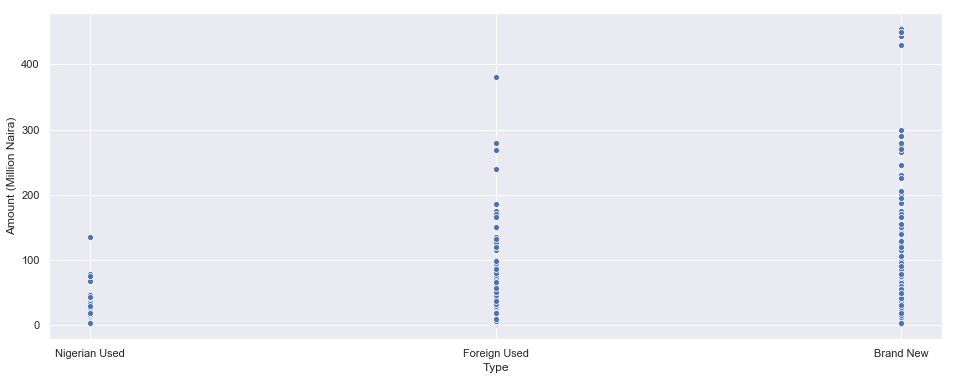

In [24]:
fig = plt.figure(figsize=(16,6))
sns.scatterplot(Train['Type'], Train['Amount (Million Naira)'])

In [25]:
Train.head()

,Location,Maker,Model,Year,Amount (Million Naira),Type,Distance
0,Abuja,Honda,Accord Coupe EX V-6,"2,011",2.2,Nigerian Used,80830.0
1,Ibadan,Hyundai,Sonata,"2,012",3.5,Nigerian Used,125000.0
2,Lagos,Lexus,RX 350,"2,010",9.2,Foreign Used,110852.0
3,Abuja,Mercedes-Benz,GLE-Class,"2,017",22.8,Foreign Used,30000.0
4,Ibadan,Toyota,Highlander,"2,002",2.6,Nigerian Used,125206.0


In [26]:

Train['Year'] =Train['Year'].str.replace(',', '').astype(int)

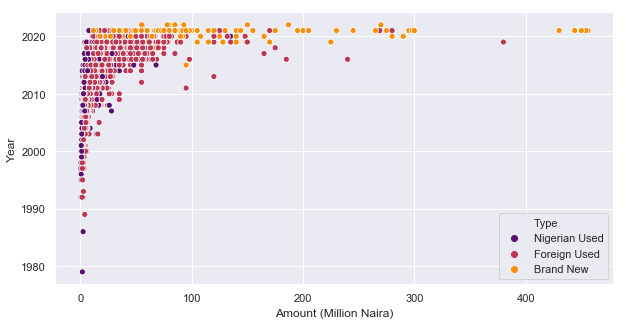

In [27]:
plt.figure(figsize = (10,5))
sns.scatterplot(Train['Amount (Million Naira)'], Train['Year'], hue = Train['Type'], palette = 'inferno')

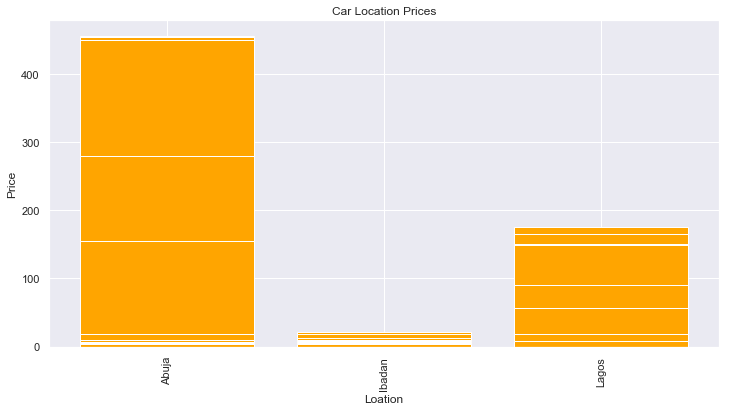

In [28]:
fig = plt.figure(figsize=(12,6))

plt.bar(x = Train['Location'], height = Train['Amount (Million Naira)'] , color='orange')

plt.title('Car Location Prices')
plt.xlabel('Loation')
plt.ylabel('Price')
#plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)
        
plt.show()

In [29]:
Train.head()

,Location,Maker,Model,Year,Amount (Million Naira),Type,Distance
0,Abuja,Honda,Accord Coupe EX V-6,2011,2.2,Nigerian Used,80830.0
1,Ibadan,Hyundai,Sonata,2012,3.5,Nigerian Used,125000.0
2,Lagos,Lexus,RX 350,2010,9.2,Foreign Used,110852.0
3,Abuja,Mercedes-Benz,GLE-Class,2017,22.8,Foreign Used,30000.0
4,Ibadan,Toyota,Highlander,2002,2.6,Nigerian Used,125206.0


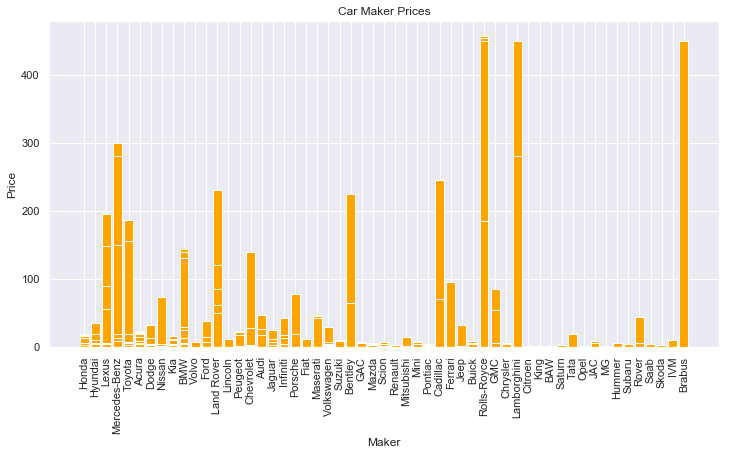

In [30]:
fig = plt.figure(figsize=(12,6))

plt.bar(x = Train['Maker'], height = Train['Amount (Million Naira)'] , color='orange')

plt.title('Car Maker Prices')
plt.xlabel('Maker')
plt.ylabel('Price')
#plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)
        
plt.show()

In [31]:
NewTrain = Train.drop(['Model'], axis = 1, inplace = True)

In [32]:
Train.head()

,Location,Maker,Year,Amount (Million Naira),Type,Distance
0,Abuja,Honda,2011,2.2,Nigerian Used,80830.0
1,Ibadan,Hyundai,2012,3.5,Nigerian Used,125000.0
2,Lagos,Lexus,2010,9.2,Foreign Used,110852.0
3,Abuja,Mercedes-Benz,2017,22.8,Foreign Used,30000.0
4,Ibadan,Toyota,2002,2.6,Nigerian Used,125206.0


In [33]:
Train =Train[['Location', 'Maker', 'Year', 'Type', 'Distance', 'Amount (Million Naira)']]

In [34]:
Train.head()

,Location,Maker,Year,Type,Distance,Amount (Million Naira)
0,Abuja,Honda,2011,Nigerian Used,80830.0,2.2
1,Ibadan,Hyundai,2012,Nigerian Used,125000.0,3.5
2,Lagos,Lexus,2010,Foreign Used,110852.0,9.2
3,Abuja,Mercedes-Benz,2017,Foreign Used,30000.0,22.8
4,Ibadan,Toyota,2002,Nigerian Used,125206.0,2.6


In [35]:
Train.Maker.nunique()

55

In [36]:
der = Train.Maker.value_counts()
der.head(10)

Toyota           2701
Lexus            1543
Mercedes-Benz    1199
Honda             356
Hyundai           160
Acura             151
Land Rover        124
Ford              120
BMW               111
Nissan            101
Name: Maker, dtype: int64

In [37]:
MakerUnique_Values = Train.Maker.value_counts()
SmallMaker = MakerUnique_Values[MakerUnique_Values<=119]
SmallMaker

def GroupedMakers(Value):
    if Value in SmallMaker:
        return 'Other Makers'
    else:
        return Value
    
Train['Maker'] = Train['Maker'].apply(GroupedMakers) 
Train['Maker'].value_counts()

Toyota           2701
Lexus            1543
Mercedes-Benz    1199
Other Makers      732
Honda             356
Hyundai           160
Acura             151
Land Rover        124
Ford              120
Name: Maker, dtype: int64

In [38]:
Train.head()

,Location,Maker,Year,Type,Distance,Amount (Million Naira)
0,Abuja,Honda,2011,Nigerian Used,80830.0,2.2
1,Ibadan,Hyundai,2012,Nigerian Used,125000.0,3.5
2,Lagos,Lexus,2010,Foreign Used,110852.0,9.2
3,Abuja,Mercedes-Benz,2017,Foreign Used,30000.0,22.8
4,Ibadan,Toyota,2002,Nigerian Used,125206.0,2.6


In [39]:
Train.shape

(7086, 6)

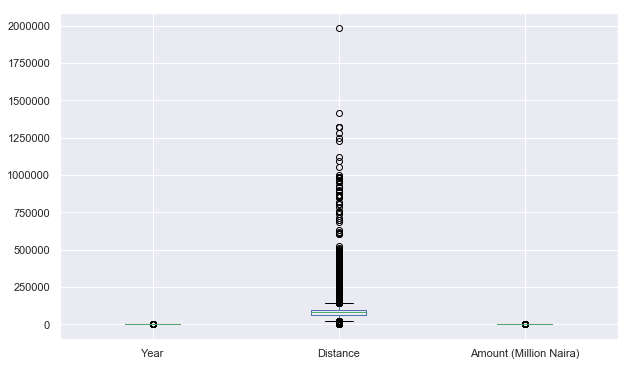

In [40]:
Train.boxplot(figsize=(10,6))

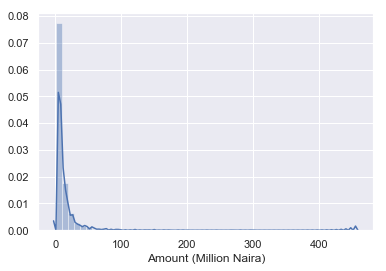

In [41]:
sns.distplot(Train['Amount (Million Naira)'])

In [42]:
# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus we must deal with them in some way

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = Train['Amount (Million Naira)'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = Train[Train['Amount (Million Naira)'] < q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Location,Maker,Year,Type,Distance,Amount (Million Naira)
count,7014,7014,7014.000000,7014,7.014000e+03,7014.000000
unique,3,9,NaN,3,NaN,NaN
top,Lagos,Toyota,NaN,Foreign Used,NaN,NaN
freq,3226,2693,NaN,4968,NaN,NaN
mean,NaN,NaN,2010.949387,NaN,9.667795e+04,9.924048
std,NaN,NaN,4.805663,NaN,9.864422e+04,12.229211
min,NaN,NaN,1979.000000,NaN,1.000000e+00,0.450000
25%,NaN,NaN,2008.000000,NaN,6.643000e+04,3.500000
50%,NaN,NaN,2011.000000,NaN,8.083000e+04,5.630000
75%,NaN,NaN,2014.000000,NaN,9.633150e+04,11.437500


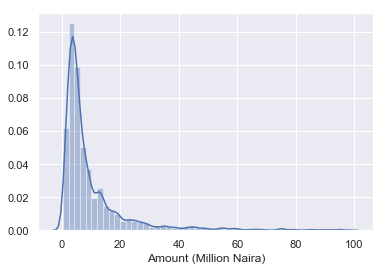

In [43]:
sns.distplot(data_1['Amount (Million Naira)'])

In [44]:
Price = data_1['Amount (Million Naira)']
# Get statistics
min_val = Price.min()
max_val = Price.max()
mean_val =Price.mean()
med_val = Price.median()
mod_val = Price.mode()[0]




C:\Users\Mnesoma\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


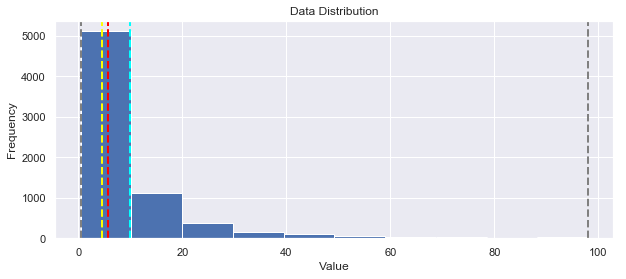

In [45]:
# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(Price)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

C:\Users\Mnesoma\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


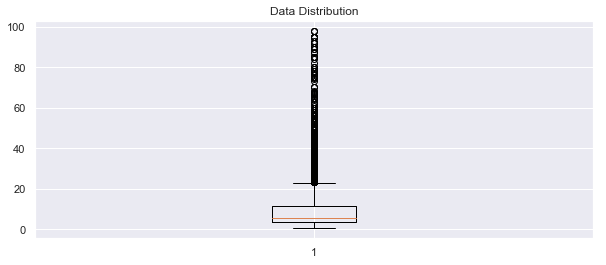

In [46]:
# Get the variable to examine
Price = data_1['Amount (Million Naira)']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(Price )

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
fig.show()

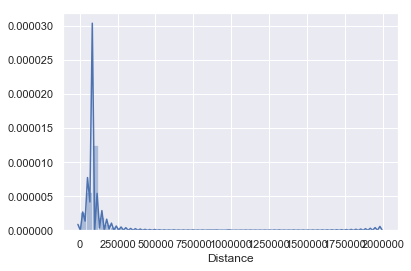

In [47]:
sns.distplot(data_1['Distance'])

In [48]:
q = data_1['Distance'].quantile(0.99)
data_2 = data_1[data_1['Distance'] < q]

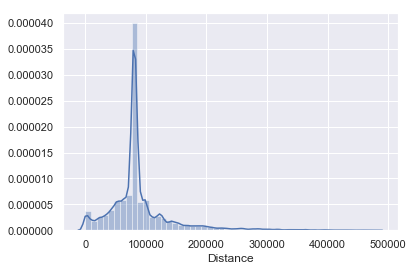

In [49]:
sns.distplot(data_2['Distance'])

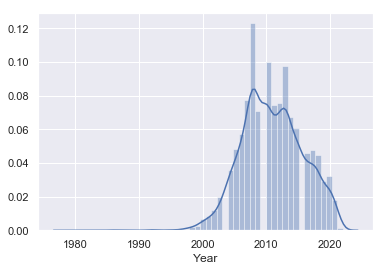

In [50]:
sns.distplot(data_2['Year'])

In [51]:
# I'll simply remove them
q = data_2['Year'].quantile(0.01)
data_3 = data_2[data_2['Year']>q]

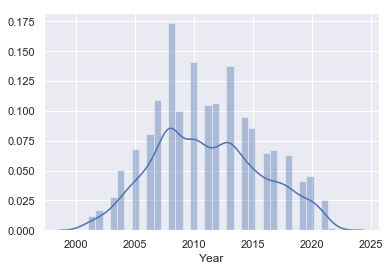

In [52]:
sns.distplot(data_3['Year'])

In [53]:
data_cleaned = data_3.reset_index(drop=True)

In [54]:
data_cleaned.describe(include='all')

,Location,Maker,Year,Type,Distance,Amount (Million Naira)
count,6860,6860,6860.000000,6860,6860.000000,6860.000000
unique,3,9,NaN,3,NaN,NaN
top,Lagos,Toyota,NaN,Foreign Used,NaN,NaN
freq,3148,2631,NaN,4896,NaN,NaN
mean,NaN,NaN,2011.139942,NaN,88013.616181,10.078869
std,NaN,NaN,4.597293,NaN,53376.214514,12.315434
min,NaN,NaN,2001.000000,NaN,1.000000,0.600000
25%,NaN,NaN,2008.000000,NaN,65415.750000,3.550000
50%,NaN,NaN,2011.000000,NaN,80830.000000,5.700000
75%,NaN,NaN,2014.000000,NaN,95000.000000,11.500000


In [55]:
data_cleaned.head()

,Location,Maker,Year,Type,Distance,Amount (Million Naira)
0,Abuja,Honda,2011,Nigerian Used,80830.0,2.2
1,Ibadan,Hyundai,2012,Nigerian Used,125000.0,3.5
2,Lagos,Lexus,2010,Foreign Used,110852.0,9.2
3,Abuja,Mercedes-Benz,2017,Foreign Used,30000.0,22.8
4,Ibadan,Toyota,2002,Nigerian Used,125206.0,2.6


C:\Users\Mnesoma\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


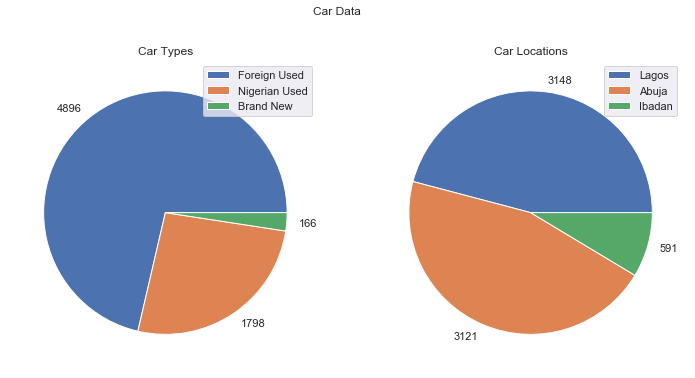

In [56]:
 #Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (12,6))

# Create a bar plot of name vs grade on the first axis
Type_counts = data_cleaned['Type'].value_counts()
ax[0].pie(Type_counts, labels=Type_counts)
ax[0].set_title('Car Types')
ax[0].legend(Type_counts.keys().tolist())

# Create a pie chart of pass counts on the second axis
Location_counts = data_cleaned['Location'].value_counts()
ax[1].pie(Location_counts, labels=Location_counts)
ax[1].set_title('Car Locations')
ax[1].legend(Location_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Car Data')

# Show the figure
fig.show()
    

Text(0.5, 1.0, 'Price and Distance')

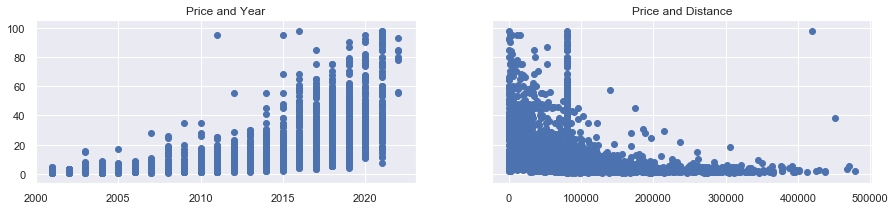

In [58]:
#since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)

f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize = (15,3)) # sharey is 'Share' Price as Y 
ax1.scatter(data_cleaned['Year'], data_cleaned['Amount (Million Naira)'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['Distance'], data_cleaned['Amount (Million Naira)'])
ax2.set_title('Price and Distance')


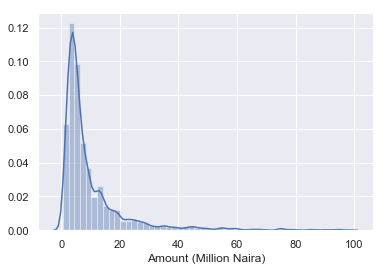

In [59]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.distplot(data_cleaned['Amount (Million Naira)'])

In [60]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Amount (Million Naira)'])

# Then we add it to our data frame
data_cleaned['Log Price'] = log_price
data_cleaned

,Location,Maker,Year,Type,Distance,Amount (Million Naira),Log Price
0,Abuja,Honda,2011,Nigerian Used,80830.0,2.20,0.788457
1,Ibadan,Hyundai,2012,Nigerian Used,125000.0,3.50,1.252763
2,Lagos,Lexus,2010,Foreign Used,110852.0,9.20,2.219203
3,Abuja,Mercedes-Benz,2017,Foreign Used,30000.0,22.80,3.126761
4,Ibadan,Toyota,2002,Nigerian Used,125206.0,2.60,0.955511
5,Lagos,Toyota,2011,Foreign Used,80830.0,7.50,2.014903
6,Lagos,Lexus,2019,Foreign Used,80830.0,79.00,4.369448
7,Abuja,Toyota,2015,Foreign Used,80830.0,9.00,2.197225
8,Lagos,Toyota,2012,Foreign Used,350882.0,7.76,2.048982
9,Ibadan,Mercedes-Benz,2004,Foreign Used,179638.0,2.50,0.916291


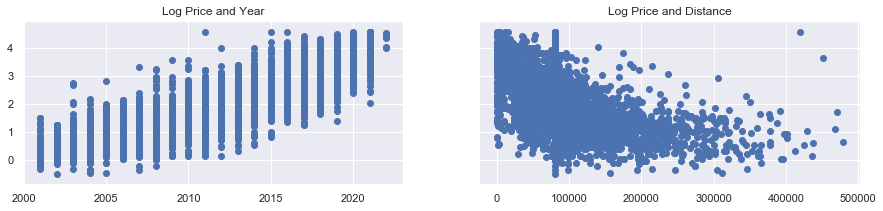

In [61]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize = (15,3)) # sharey is 'Share' Price as Y 
ax1.scatter(data_cleaned['Year'], data_cleaned['Log Price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['Distance'], data_cleaned['Log Price'])
ax2.set_title('Log Price and Distance')

plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

In [62]:
# Lets drop original Price column since its no longer needed 

data_cleaned = data_cleaned.drop(['Amount (Million Naira)'], axis = 1)

In [63]:
# sklearn does not have a built-in way to check for multicollinearity

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Distance','Year']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [64]:
# Let's explore the result
vif

,VIF,Features
0,3.70685,Distance
1,3.70685,Year


In [65]:
data_cleaned.head()

,Location,Maker,Year,Type,Distance,Log Price
0,Abuja,Honda,2011,Nigerian Used,80830.0,0.788457
1,Ibadan,Hyundai,2012,Nigerian Used,125000.0,1.252763
2,Lagos,Lexus,2010,Foreign Used,110852.0,2.219203
3,Abuja,Mercedes-Benz,2017,Foreign Used,30000.0,3.126761
4,Ibadan,Toyota,2002,Nigerian Used,125206.0,0.955511


In [66]:
data_cleaned.duplicated().sum()

175

In [67]:
data_cleaned.drop_duplicates(inplace = True)

In [68]:
data_cleaned.duplicated().sum()

0

In [69]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity

data_with_dum = pd.get_dummies(data_cleaned, drop_first = False)
data_with_dummies = pd.get_dummies(data_cleaned, drop_first = True)

In [70]:
data_with_dummies.head()

,Year,Distance,Log Price,Location_Ibadan,Location_Lagos,Maker_Ford,Maker_Honda,Maker_Hyundai,Maker_Land Rover,Maker_Lexus,Maker_Mercedes-Benz,Maker_Other Makers,Maker_Toyota,Type_Foreign Used,Type_Nigerian Used
0,2011,80830.0,0.788457,0,0,0,1,0,0,0,0,0,0,0,1
1,2012,125000.0,1.252763,1,0,0,0,1,0,0,0,0,0,0,1
2,2010,110852.0,2.219203,0,1,0,0,0,0,1,0,0,0,1,0
3,2017,30000.0,3.126761,0,0,0,0,0,0,0,1,0,0,1,0
4,2002,125206.0,0.955511,1,0,0,0,0,0,0,0,0,1,0,1


In [71]:
data_with_dummies.columns.values

array(['Year', 'Distance', 'Log Price', 'Location_Ibadan',
       'Location_Lagos', 'Maker_Ford', 'Maker_Honda', 'Maker_Hyundai',
       'Maker_Land Rover', 'Maker_Lexus', 'Maker_Mercedes-Benz',
       'Maker_Other Makers', 'Maker_Toyota', 'Type_Foreign Used',
       'Type_Nigerian Used'], dtype=object)

In [72]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['Log Price', 'Distance', 'Year','Location_Ibadan',
       'Location_Lagos', 'Maker_Ford', 'Maker_Honda', 'Maker_Hyundai',
       'Maker_Land Rover', 'Maker_Lexus', 'Maker_Mercedes-Benz',
       'Maker_Other Makers', 'Maker_Toyota', 'Type_Foreign Used',
       'Type_Nigerian Used']

In [73]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Log Price,Distance,Year,Location_Ibadan,Location_Lagos,Maker_Ford,Maker_Honda,Maker_Hyundai,Maker_Land Rover,Maker_Lexus,Maker_Mercedes-Benz,Maker_Other Makers,Maker_Toyota,Type_Foreign Used,Type_Nigerian Used
0,0.788457,80830.0,2011,0,0,0,1,0,0,0,0,0,0,0,1
1,1.252763,125000.0,2012,1,0,0,0,1,0,0,0,0,0,0,1
2,2.219203,110852.0,2010,0,1,0,0,0,0,1,0,0,0,1,0
3,3.126761,30000.0,2017,0,0,0,0,0,0,0,1,0,0,1,0
4,0.955511,125206.0,2002,1,0,0,0,0,0,0,0,0,1,0,1


In [74]:
# Lets check for multicolliniearity after converting dummies to numerical 


variables = data_preprocessed.drop(['Log Price'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,4.409202,Distance
1,88.798772,Year
2,1.274546,Location_Ibadan
3,2.374246,Location_Lagos
4,1.850411,Maker_Ford
5,3.447808,Maker_Honda
6,2.103411,Maker_Hyundai
7,1.857414,Maker_Land Rover
8,11.109436,Maker_Lexus
9,8.831914,Maker_Mercedes-Benz


In [75]:
target = data_preprocessed['Log Price']
inputs = data_preprocessed.drop(['Log Price'], axis = 1)

In [76]:
 data_preprocessed.head()

,Log Price,Distance,Year,Location_Ibadan,Location_Lagos,Maker_Ford,Maker_Honda,Maker_Hyundai,Maker_Land Rover,Maker_Lexus,Maker_Mercedes-Benz,Maker_Other Makers,Maker_Toyota,Type_Foreign Used,Type_Nigerian Used
0,0.788457,80830.0,2011,0,0,0,1,0,0,0,0,0,0,0,1
1,1.252763,125000.0,2012,1,0,0,0,1,0,0,0,0,0,0,1
2,2.219203,110852.0,2010,0,1,0,0,0,0,1,0,0,0,1,0
3,3.126761,30000.0,2017,0,0,0,0,0,0,0,1,0,0,1,0
4,0.955511,125206.0,2002,1,0,0,0,0,0,0,0,0,1,0,1


In [77]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

C:\Users\Mnesoma\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [78]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

C:\Users\Mnesoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  


In [79]:
from sklearn.model_selection import train_test_split 

In [80]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size = 0.2, random_state =365)

In [81]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(5348, 14) (1337, 14)
(5348,) (1337,)


In [82]:
reg = LinearRegression() # Creating LinRegression Model

reg.fit(x_train, y_train) # training the scaled input with the train target 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

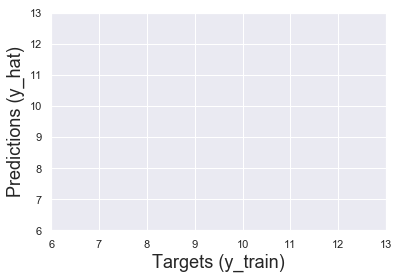

In [84]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

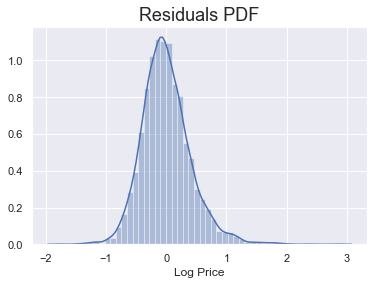

In [85]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)

In [86]:
# Find the R-squared of the model
reg.score(x_train,y_train)


0.787521725109521

In [87]:
# Obtain the bias (intercept) of the regression
reg.intercept_

1.8689315677372622

In [88]:
# Obtain the weights (coefficients) of the regression
reg.coef_

array([-0.04314998,  0.6162957 , -0.02028818,  0.02977352, -0.00875371,
       -0.05750877, -0.06155297,  0.10130194,  0.1666678 ,  0.14111837,
       -0.01993228,  0.04223162, -0.19086635, -0.33795634])

In [89]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Distance,-0.043150
1,Year,0.616296
2,Location_Ibadan,-0.020288
3,Location_Lagos,0.029774
4,Maker_Ford,-0.008754
5,Maker_Honda,-0.057509
6,Maker_Hyundai,-0.061553
7,Maker_Land Rover,0.101302
8,Maker_Lexus,0.166668
9,Maker_Mercedes-Benz,0.141118


In [90]:
# Check the different categories in the 'Brand' variable
Train['Maker'].unique()

# In this way we can see which 'Brand' is actually the benchmark

array(['Honda', 'Hyundai', 'Lexus', 'Mercedes-Benz', 'Toyota', 'Acura',
       'Other Makers', 'Ford', 'Land Rover'], dtype=object)

In [91]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen

# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

In [92]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ['Predictions'])

In [93]:
df_pf

,Predictions
0,0.970345
1,2.508496
2,6.252159
3,3.384425
4,7.839073
5,13.598613
6,2.960828
7,7.407063
8,16.287674
9,2.550907


In [94]:
df_pf['Target'] = np.exp(y_test)

In [95]:
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Predictions,Target
0,0.970345,2.20
1,2.508496,NaN
2,6.252159,NaN
3,3.384425,NaN
4,7.839073,NaN
5,13.598613,7.50
6,2.960828,NaN
7,7.407063,9.00
8,16.287674,7.76
9,2.550907,NaN


In [96]:
# The old indexes are preserved (recall earlier in that code we made a note on that)

y_test = y_test.reset_index(drop=True)

y_test

0      -0.385662
1       0.832909
2       1.470176
3       1.386294
4       2.079442
5       3.157000
6       1.536867
7       1.871802
8       2.397895
9       1.011601
10      2.442347
11      1.054312
12      1.824549
13      2.890372
14      1.193922
15      1.348073
16      2.639057
17      1.252763
18      1.435085
19      0.993252
20      2.970414
21      3.218876
22      1.824549
23      3.314186
24      2.821379
25      2.862201
26      1.774952
27      3.328627
28      0.693147
29      1.528228
          ...   
1307    1.722767
1308    1.945910
1309    3.806662
1310    1.916923
1311    1.163151
1312    3.210844
1313    0.530628
1314    1.547563
1315    2.476538
1316    1.871802
1317    1.423108
1318    1.526056
1319    2.803360
1320    0.587787
1321    2.163323
1322    1.302913
1323    1.458615
1324    2.687847
1325    2.266958
1326    0.182322
1327    0.908259
1328    0.615186
1329    2.602690
1330    1.033184
1331    3.610918
1332    0.647103
1333    2.251292
1334    1.1939

In [97]:
# Additionally, we can calculate the difference between the targets and the predictions

df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']
df_pf
# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

,Predictions,Target,Residual
0,0.970345,2.20,1.229655
1,2.508496,NaN,NaN
2,6.252159,NaN,NaN
3,3.384425,NaN,NaN
4,7.839073,NaN,NaN
5,13.598613,7.50,-6.098613
6,2.960828,NaN,NaN
7,7.407063,9.00,1.592937
8,16.287674,7.76,-8.527674
9,2.550907,NaN,NaN


In [98]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Difference%
0,0.970345,2.20,1.229655,55.893388
1,2.508496,NaN,NaN,NaN
2,6.252159,NaN,NaN,NaN
3,3.384425,NaN,NaN,NaN
4,7.839073,NaN,NaN,NaN
5,13.598613,7.50,-6.098613,81.314839
6,2.960828,NaN,NaN,NaN
7,7.407063,9.00,1.592937,17.699300
8,16.287674,7.76,-8.527674,109.892705
9,2.550907,NaN,NaN,NaN


In [99]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,1337.000000,261.000000,261.000000,261.000000
mean,8.938216,9.729885,0.894374,135.883947
std,8.031399,11.447013,13.455020,223.807373
min,0.887768,0.700000,-35.856214,0.132457
25%,3.688117,3.800000,-5.184834,37.555279
50%,6.179536,6.000000,0.017755,62.857450
75%,11.314167,11.500000,4.683160,111.507731
max,52.879285,87.500000,85.774051,1550.682842


In [100]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
103,4.11,4.10,-0.01,0.13
1073,3.58,3.60,0.02,0.49
520,4.25,4.30,0.05,1.26
1201,19.70,20.00,0.30,1.49
422,13.05,13.30,0.25,1.85
392,4.10,4.00,-0.10,2.40
390,4.52,4.40,-0.12,2.76
863,5.78,6.00,0.22,3.70
402,2.59,2.70,0.11,3.93
311,10.04,10.50,0.46,4.41


In [101]:
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,1337.00,261.00,261.00,261.00
mean,8.94,9.73,0.89,135.88
std,8.03,11.45,13.46,223.81
min,0.89,0.70,-35.86,0.13
25%,3.69,3.80,-5.18,37.56
50%,6.18,6.00,0.02,62.86
75%,11.31,11.50,4.68,111.51
max,52.88,87.50,85.77,1550.68


In [102]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Accuracy of the Training Model
print(f"MSE of MODEL is {round(mean_squared_error(y_train, y_hat),2)}")
from math import sqrt

rmse = sqrt(mean_squared_error(y_train, y_hat))
print(f'RMSE of Model is {round(rmse, 2)}')
print(f"MAE of MODEL is {round(mean_absolute_error(y_train, y_hat),2)}")

MSE of MODEL is 0.17
RMSE of Model is 0.41
MAE of MODEL is 0.31


In [103]:
# Accuracy of the Testing predictions
pred = reg.predict(x_test)

In [104]:
print(f"MSE of MODEL is {round(mean_squared_error(y_test, pred),2)}")
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, pred))
print(f'RMSE of Model is {round(rmse, 2)}')
print(f"MAE of MODEL is {round(mean_absolute_error(y_test, pred),2)}")


MSE of MODEL is 0.15
RMSE of Model is 0.39
MAE of MODEL is 0.29


In [105]:
print(np.mean(df_pf['Difference%']))

135.88394674987993
